- Which are the most profitable brands?
- What is the premium attributed to each different status?
- What are the most profitable catalogs?

In [56]:
import pandas as pd
from sqlalchemy import create_engine
import os
import json
import matplotlib.pyplot as plt


def load_credentials(path = "aws_rds_credentials.json"):
     with open(path, 'r') as file:
          config = json.load(file)

     # set up credentials
     for key in config.keys():
          os.environ[key] = config[key]

     return

time_interval = 90 #days

load_credentials()

aws_rds_url = f"postgresql://{os.environ['user']}:{os.environ['password']}@{os.environ['host']}:{os.environ['port']}/{os.environ['database']}?sslmode=require"

engine = create_engine(aws_rds_url)
sql_query = f"""SELECT brand_title, AVG(price_numeric) as price_numeric, STDDEV(price_numeric) as std_price
               FROM public.tracking_staging 
               WHERE date >= CURRENT_DATE - INTERVAL '{time_interval} days'
               GROUP BY brand_title
               HAVING COUNT (*) > 30
               """
data = pd.read_sql(sql_query, engine)
data

,brand_title,price_numeric,std_price
0,Cider,9.865385,4.068188
1,Fantaisie,2.889764,1.261319
2,Victoria,8.954128,5.641095
3,Cloothes,4.333333,0.477567
4,Urban Outfitters,7.217391,4.617488
...,...,...,...
1303,GRAPHIC45,12.594595,1.935910
1304,Cheap Monday,13.622951,10.864566
1305,Petit,10.000000,8.822575
1306,Claudie Pierlot,30.804878,23.929291


In [57]:
# getting max average price per catalog and brand
data2 = data
data2["normalized_price"] = data2["price_numeric"]/data2["std_price"]
data2.sort_values(by = "price_numeric", ascending= False).head(10)

,brand_title,price_numeric,std_price,normalized_price
152,Louis Vuitton,390.405405,308.063202,1.267290
142,Hermès,360.555556,454.284017,0.793679
671,Vetements,286.781250,230.983275,1.241567
88,Mano,283.136364,575.566706,0.491926
1246,O.A.M.C.,265.000000,76.411450,3.468067
420,Golden Goose,240.438596,100.801612,2.385265
454,John Lobb,238.571429,186.486758,1.279294
245,Fendi,234.812500,216.672312,1.083722
1199,Casadei,214.444444,94.545697,2.268157
394,Isabel Marant,174.462338,60.271860,2.894590


In [58]:
sql_query = f"""SELECT brand_title, SUM(price_numeric) as volume, count(*) as count
               FROM public.tracking_staging 
               WHERE date >= CURRENT_DATE - INTERVAL '90 days'
               GROUP BY brand_title
               HAVING COUNT (*) > 30
               """
data = pd.read_sql(sql_query, engine)
data

,brand_title,volume,count
0,Cider,513,52
1,Fantaisie,367,127
2,Victoria,976,109
3,Cloothes,169,39
4,Urban Outfitters,1162,161
...,...,...,...
1303,GRAPHIC45,466,37
1304,Cheap Monday,831,61
1305,Petit,380,38
1306,Claudie Pierlot,1263,41


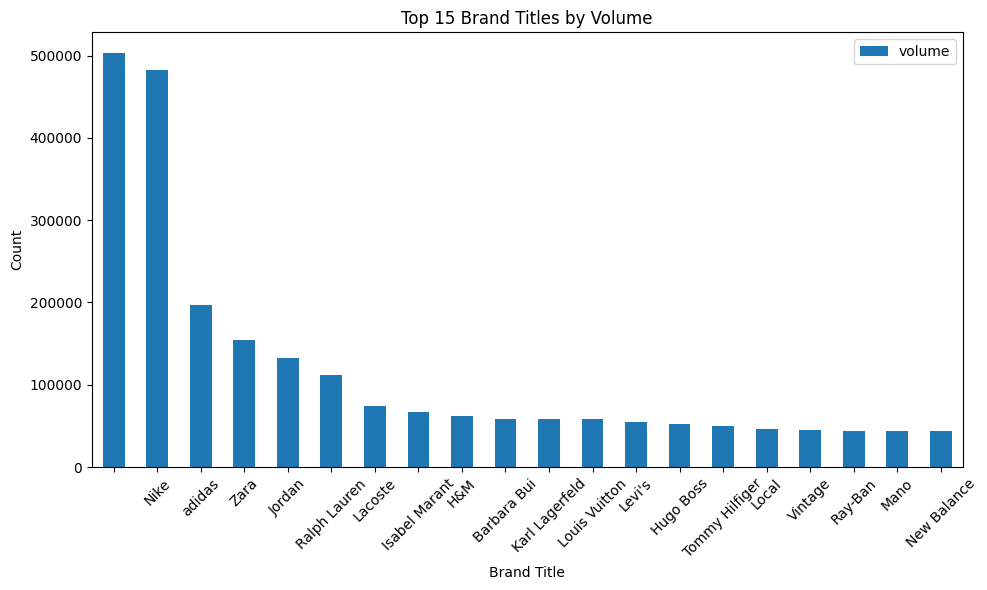

In [61]:
top_brands = data.sort_values(by = "volume", ascending= False).head(20)
# Plot the bar chart
top_brands.plot(kind='bar', x='brand_title', y='volume', figsize=(10, 6))
plt.xlabel('Brand Title')
plt.ylabel('Count')
plt.title('Top 15 Brand Titles by Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

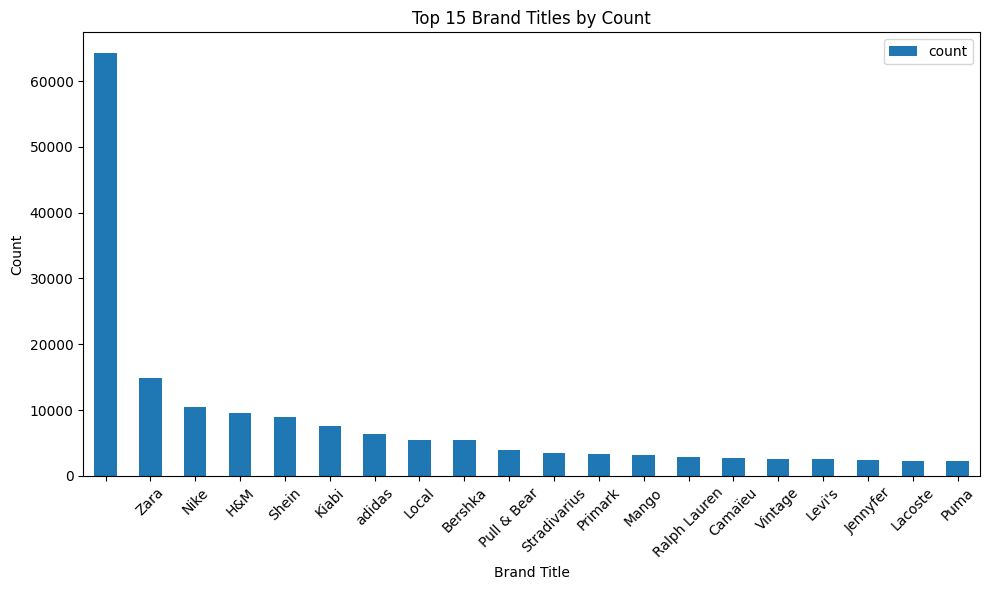

In [60]:
top_brands = data.sort_values(by = "count", ascending= False).head(20)
# Plot the bar chart
top_brands.plot(kind='bar', x='brand_title', y='count', figsize=(10, 6))
plt.xlabel('Brand Title')
plt.ylabel('Count')
plt.title('Top 20 Brand Titles by Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()